In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [123]:
df = pd.read_csv('Labeled Data/data_labelling_comments.csv', header=0)
dff = pd.read_csv('Labeled Data/data_labelling_comments1.csv', header=0)
df = df[['text', 'label']]

#dff = dff[['text', 'label']]
#df1 = df.append(dff, ignore_index=True)

#df = df.iloc[2:]
#df1 = df.tail(-2)

df1 = df
df1

,text,label
0,"Mmmm yes, forward thinking, like underground t...",-1
1,Probably not. It's like if attaching horse to ...,0
2,Cool in any decade ever! A rocket going to spa...,1
3,"He is on of the most famous people out there, ...",1
4,The **average** rent for an apartment in Los A...,1
...,...,...
198,"Licence to print money after, I'll line up to ...",1
199,That’s not good,-1
200,[Betteridge's law](https://en.wikipedia.org/wi...,0
201,"Tedros is just jerking off China, at their com...",-1


In [124]:
from sklearn.model_selection import train_test_split

#X = data.drop('class', axis=1)
#X = df1[['title', 'upvotes', 'downvotes', 'score', 'label']]
X = df1['text']
y = df1['label']


#display(y.to_string())

In [125]:
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=16
)


In [126]:
from keras.utils import to_categorical
one_hot_label = to_categorical(y_train, num_classes=3)
y_train = one_hot_label
ohl = to_categorical(y_test, num_classes=3)
y_test = ohl

In [80]:
X_train

197    Did he said the pandemic was ending in few wee...
192    Glad to see the Elon sycophants and right-wing...
180    The WHO and WEF are just modern villains most ...
156    I think a lot of people do unfortunately. For ...
181    Doctor here. Tell me more about the WHO’s fail...
                             ...                        
123    Having a WHO with information from 194 member ...
65     But the organisation would be worse without Ch...
69                                 I will never give up.
121    So naïve. If covid response is so A political ...
169    Yeah, pretty sure each one of those claims is ...
Name: text, Length: 162, dtype: object

In [17]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [30]:
y_test

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [127]:
from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]

In [128]:
n_words1

1789

<h1>For binary

In [ ]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

<h1> For multi class

In [44]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

#use categorical cos not binary
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

test_mod = model

Epoch 1/15
6/6 [==============================] - 1s 57ms/step - loss: 1.8192 - acc: 0.3395 - val_loss: 1.0429 - val_acc: 0.6829
Epoch 2/15
6/6 [==============================] - 0s 20ms/step - loss: 1.3620 - acc: 0.4259 - val_loss: 1.0263 - val_acc: 0.6341
Epoch 3/15
6/6 [==============================] - 0s 17ms/step - loss: 1.5912 - acc: 0.3272 - val_loss: 0.9617 - val_acc: 0.6829
Epoch 4/15
6/6 [==============================] - 0s 21ms/step - loss: 1.1934 - acc: 0.4630 - val_loss: 0.9294 - val_acc: 0.6829
Epoch 5/15
6/6 [==============================] - 0s 14ms/step - loss: 1.3345 - acc: 0.4074 - val_loss: 0.9179 - val_acc: 0.6829
Epoch 6/15
6/6 [==============================] - 0s 13ms/step - loss: 1.2181 - acc: 0.4815 - val_loss: 0.8955 - val_acc: 0.6829
Epoch 7/15
6/6 [==============================] - 0s 12ms/step - loss: 1.1059 - acc: 0.5432 - val_loss: 0.8658 - val_acc: 0.6829
Epoch 8/15
6/6 [==============================] - 0s 13ms/step - loss: 1.0422 - acc: 0.5494 - val

In [40]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


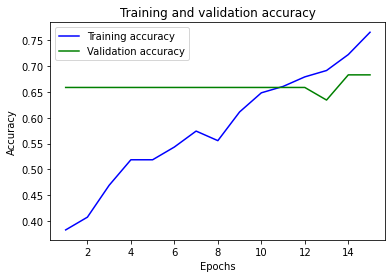

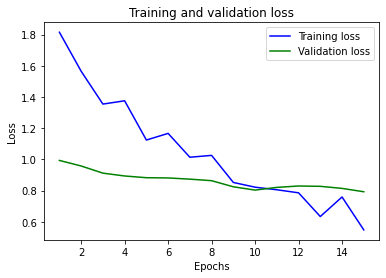

In [41]:
plot_history(history)

<h1> test on others

In [47]:
test_mod.save("testmodel.h5")

In [55]:
test_mod.save_weights("testweights.h5")

In [54]:
test_mod.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               916480    
                                                                 
 batch_normalization_26 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_27 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_27 (Dropout)        (None, 256)              

In [252]:
model1 = models.load_model("testmodel.h5")
testdf = pd.read_csv('Cleaned datasets/cmts_cleaned.csv', header=0)
testdf = testdf['cleaned_text']
testdf = testdf.head(50)

In [250]:
predictions = []

In [253]:
for i in testdf:
    t = [str(i)]
    t = tokenizer.texts_to_matrix(t, mode='count')
    pred = test_mod.predict(t, verbose=0)
    print(pred[0])
    
    if(pred[0][0] >= pred[0][1]) and (pred[0][0] >= pred[0][2]):
        predictions.append(-1)
    elif(pred[0][1] >= pred[0][0]) and (pred[0][1] >= pred[0][2]):
        predictions.append(0)
    else:
        predictions.append(1)
#    break
print(predictions)

[0.50480294 0.20438887 0.29080826]
[0.5161328  0.22634795 0.25751933]
[0.37581882 0.23584113 0.3883401 ]
[0.42778957 0.27448857 0.29772186]
[0.49979553 0.26242536 0.23777914]
[1.3547638e-04 5.7502608e-03 9.9411434e-01]
[0.23733112 0.17154546 0.5911234 ]
[0.5216474  0.21184199 0.2665106 ]
[0.38772604 0.35784224 0.25443172]
[0.42224282 0.19166242 0.38609475]
[0.5306421  0.2390119  0.23034601]
[0.70265657 0.21307538 0.08426804]
[0.29127836 0.2268247  0.4818969 ]
[0.60157704 0.16632652 0.23209643]
[0.67906004 0.15045479 0.17048518]
[0.09852838 0.15265343 0.7488183 ]
[0.3926248  0.19313066 0.41424456]
[0.63176936 0.18197624 0.18625443]
[0.44329828 0.18281138 0.3738903 ]
[0.5216474  0.21184199 0.2665106 ]
[0.5885507  0.2040644  0.20738494]
[0.38542944 0.28307298 0.33149752]
[0.41850442 0.17394747 0.4075481 ]
[0.45184708 0.22050425 0.32764864]
[0.20852481 0.15982646 0.6316487 ]
[0.52745765 0.20300709 0.2695353 ]
[0.5421718  0.17620799 0.28162023]
[0.5437137  0.21086505 0.24542129]
[0.5216474 

In [ ]:
cleanPredict = []
for tuple in predictions:
    max = np.argmax(tuple)
    temp = [max]
    cleanPredict.append(temp)
cleanPredict

In [ ]:
df = pd.read_csv('comments.csv')
df